In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_df.csv to final_df (1).csv


In [3]:
df=pd.read_csv('final_df.csv')
df.head()

,date,sp_close,sp_volume,median_sale_price,homes_sold,inflation_rate,sales,unemployment_rate,nas_close,nas_volume
0,2012-05-01,1310.33,14171819000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-06-01,1362.16,13748606000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-07-01,1379.32,12125974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-08-01,1406.58,11021329000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-09-01,1440.67,11125102000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [5]:
df.columns

Index(['date', 'sp_close', 'sp_volume', 'median_sale_price', 'homes_sold',
       'inflation_rate', 'sales', 'unemployment_rate', 'nas_close',
       'nas_volume'],
      dtype='object')

In [6]:
final_df=df.dropna()
final_df.head()

,date,sp_close,sp_volume,median_sale_price,homes_sold,inflation_rate,sales,unemployment_rate,nas_close,nas_volume
56,2017-01-01,2278.87,42691599000,246000.0,"360,977",2.6,368960.0,4.7,5614.786,8.376144e+09
57,2017-02-01,2363.64,40740785000,247000.0,"369,081",2.7,365480.0,4.6,5825.438,8.563523e+09
58,2017-03-01,2362.72,47262643000,257000.0,"533,610",2.5,422891.0,4.4,5911.738,1.099896e+10
59,2017-04-01,2384.20,37735945000,262000.0,"516,823",2.5,407165.0,4.4,6047.606,8.302492e+09
60,2017-05-01,2411.80,44654185000,269000.0,"630,788",2.6,434450.0,4.4,6198.517,1.023927e+10


In [7]:
final_df.dtypes

date                  object
sp_close             float64
sp_volume              int64
median_sale_price    float64
homes_sold            object
inflation_rate       float64
sales                float64
unemployment_rate    float64
nas_close            float64
nas_volume           float64
dtype: object

In [8]:
final_df.date= pd.to_datetime(final_df.date, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
final_df.dtypes

date                 datetime64[ns]
sp_close                    float64
sp_volume                     int64
median_sale_price           float64
homes_sold                   object
inflation_rate              float64
sales                       float64
unemployment_rate           float64
nas_close                   float64
nas_volume                  float64
dtype: object

In [10]:
pip install pmdarima

In [11]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(final_df['unemployment_rate'], start_p = 1, start_q = 1,
                          max_p = 2, max_q = 5, m = 12,
                          start_P = 1, Trend = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=273.076, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=202.331, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=271.158, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=223.086, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=201.538, Time=1.04 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=243.860, Time=0.36 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=202.478, Time=0.50 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=202.413, Time=0.53 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=214.493, Time=0.49 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=204.028, Time=1.11 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=200.35

In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   62
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 -96.177
Date:                            Mon, 11 Apr 2022   AIC                            200.354
Time:                                    18:39:00   BIC                            208.002
Sample:                                         0   HQIC                           203.267
                                             - 62                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8227      0.209      3.928      0.000       0.412       1.233
ar.S.L12      -0.7783      0.129     -6.056      0.000      -1.030      -0.526
ar.S.L24      -0.2496      0.917     -0.272      0.785      -2.047       1.548
sigma2         2.3184      0.114     20.324      0.000       2.095       2.542
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):              3485.47
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               9.93   Skew:                             6.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# Split data into train / test sets
train = final_df.iloc[:len(final_df)-12]
test = final_df.iloc[len(final_df)-12:] # set one year(12 months) for testing

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model = SARIMAX(train['unemployment_rate'], 
                order = (1, 1, 3))

In [33]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      unemployment_rate   No. Observations:                   50
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 -89.438
Date:                Mon, 11 Apr 2022   AIC                            188.877
Time:                        18:39:09   BIC                            198.336
Sample:                             0   HQIC                           192.466
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7690      1.756      0.438      0.661      -2.673       4.211
ma.L1         -0.8296      2.026     -0.409      0.682      -4.801       3.142
ma.L2         -0.1787      1.437     -0.124      0.901      -2.994       2.637
ma.L3          0.0458      1.413      0.032      0.974      -2.724       2.816
sigma2         2.2147      0.718      3.087      0.002       0.808       3.621
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3858.87
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):             459.73   Skew:                             6.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
start = len(train)
end = len(train) + len(test) - 1

In [35]:
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

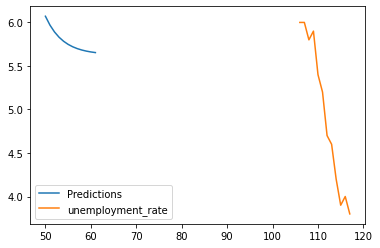

In [36]:
predictions.plot(legend = True)
test['unemployment_rate'].plot(legend = True)

In [37]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [38]:
rmse(test['unemployment_rate'], predictions)

1.0895582100609527

In [39]:
mean_squared_error(test['unemployment_rate'], predictions)

1.1871370931112268

In [46]:
# Train the model on the full dataset
model = model = SARIMAX(final_df['unemployment_rate'], 
                        order = (1, 1, 3))
result= model.fit()

In [47]:
# Forecast for the next 3 years
forecast = result.predict(start = len(final_df), 
                          end = (len(final_df)-1) + 3 * 6, 
                          typ = 'levels').rename('Forecast')

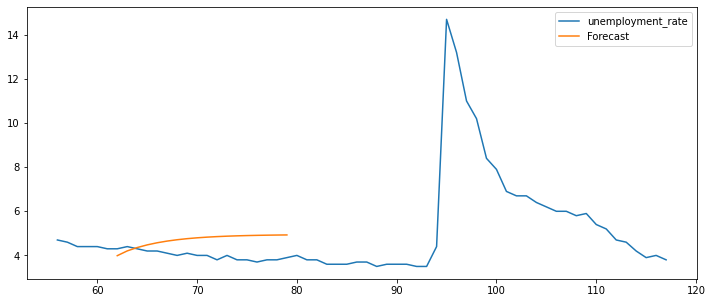

In [48]:
# Plot the forecast values
final_df['unemployment_rate'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)